# Proyecto Módulo 3
### DEFORMACIÓN Y MÓDULO ELÁSTICO DE VIGAS


### INTEGRANTES ###

> + Estephanie Mendivil 
>+ Adolfo Mariscal 
>+ Francisco Gonzalez
>+ Xareny Gonzalez Lopez

## INTRODUCCIÓN.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://eudotec.files.wordpress.com/2014/07/grandes_estructuras.jpg" width="300px" height="100px" />

A partir de este código pretendemos encontrar la deformación ultima de una viga que está soportada por apoyos simples en los extremos, esto quiere decir que permite el libre movimiento de sus extremos.

Para este propósito la carga será aplicada de forma puntual en uno de los extremos de la viga.

Se pretende que la viga llegue a el punto máximo de proporcionalidad, a partir de este punto llega al limite de fluencia donde la viga pierde su ductilidad y queda deformada.


### OBJETIVOS.

* Encontrar la deformación ultima de una viga de acero simplemente apoyada.
* Obtener la curva de deformación de la viga de acero.
* Encontrar la deformación que tendrá la viga en base a cambios de temperatura.


### OBJETIVO GENERALE.

* Encontrar la máxima deformación de una viga de acero.


### OBJETIVO ESPECÍFICO.

* Obtener la curva de deformación de una viga de acero simplemente apoyada variando la longitud de la misma utilizando la misma carga en cada variación. 


> ### MODELO

La fórmula general que nos presenta el sistema para poder obtener los datos bucados son:

$\frac{d^2}{dx^2} = \frac{M}{EI} = \frac{F}{EI} (L - x)$

La fórmula que nos permite determinar el ángulo de flexión de la viga es:

$\theta = \frac{dy}{dx} = \frac{F}{EI}(Lx-\frac{x^2}{2})$

La fórmula que nos permite determinar la flexión de la viga se obtiene integrando la fórmula anterior y está dada como:

$y=\frac{F}{EI}(\frac{L}{2}x^2 - \frac{x^3}{6})$


<img style="float: center; margin: 0px 0px 15px 15px;" src="http://engineeringfeed.com/wp-content/uploads/2017/04/continues-cantilever-beam-detailing-4.jpg" width="400px" height="250px" />

Es importante denotar que en las ecuaciones anteriormente presentadas y que permiten llevar a cabo este modelo, las variables significan lo siguiente:

$F$ = Fuerza aplicada al sistema (viga)

$E$ = Módulo elástico del material 

$L$ = Longitud de la viga (en *ft*)

$I$ = Inercia del sistema

Para nuestra simulación, usaremos una viga simple de 40 *ft* de longitud total con un módulo de elasticidad de $29000(12^2)$, una inercia de $\frac{758}{12^4}$, sobre la que se aplicará una fuerza equivalente a $-20$ unidades.

### ÁNGULO DE FLEXIÓN  ###

Se denomina flexión al tipo de deformación que presenta un elemento estructural alargado en una dirección perpendicular a su eje longitudinal. 

Se usará una barra empotrada de un de acero, de longitud L, de peralte A y de espesor B. Se fijará uno de sus extremos y se aplicará una fuerza en su extremo libre. se medira el alargamiento o acortamiento del extremo libre y (L) o flecha en función de la fuerza aplicada F. 



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline


In [2]:
L= 40 #longitud de la viga
F= -20 #fuerza aplicada
E=29000*(12**2) #Módulo elástico del material
I=758/(12**4) #inercia
x = 20
y = 0
def Pendiente(y, x):
    return (F/(E*I))*((L*x)-((x*x)/2))
print(Pendiente(y, x))

x0 = 1
tt = np.linspace(0, L+1)
xx = odeint(Pendiente, x0, tt)

-0.07860977163133473


### DEFLEXIÓN VIGA ###

Se entiende por deflexión aquella deformación que sufre un elemento por el efecto de las flexiones internas.

In [3]:
L= 40 #longitud de la viga en pies.
F= -40 #fuerza aplicada en libras.
E=29000*(12**2) #Módulo elàstico del material en KSI.
I=758/(12**4) #inercia.
x=20
y=0
def Deflexión(y, x):
    return (F/(E*I))*((L*(x*x))-((x*x*x)/6))
print(Deflexión(y, x))

x0 = 1
tt = np.linspace(0, L+1)
xx2 = odeint(Deflexión, x0, tt)


-3.843144390865253


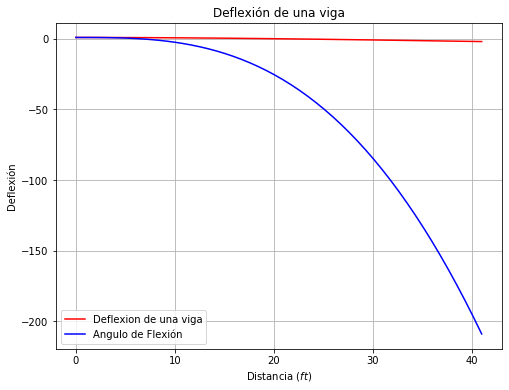

In [4]:
plt.figure(figsize=(8,6))
plt.plot(tt, xx, 'r', label = 'Deflexion de una viga')
plt.plot(tt, xx2, 'b', label = 'Angulo de Flexión')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Distancia $(ft)$')
plt.ylabel('Deflexión')
plt.title('Deflexión de una viga')
plt.show()

Con los resultados obtenidos observamos que el angulo de flexión de la viga es directamente proporcional a su longitud asi como a la fuerza aplicada en el extremo contrario. También se observar que la viga empezara el trabajo de compresión y tensión a partir de entre los 10 y 15 ft aproximadamente en donde se presenta el mayor cambio de angulo de su flexion. 

### Variando la longitud del elemento:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

L= 12 #longitud de la viga en pies.
F= -40 #fuerza aplicada en libras.
E=29000*(12**2) #Módulo elástico del material en KSI.
I=758/(12**4) #inercia
def Pendiente(y, x):
    return (F/(E*I))*((L*x)-((x*x)/2))
print(Pendiente(y, x))

x0 = 1
tt = np.linspace(0, L+1)
xx = odeint(Pendiente, x0, tt)

-0.010481302884177963


In [6]:
L= 12 #longitud de la viga
F= -40 #fuerza aplicada
E=29000*(12**2) #Módulo elàstico del material en KSI.
I=758/(12**4) #inercia
x=20
y=0
def Deflexión(y, x):
    return (F/(E*I))*((L*(x*x))-((x*x*x)/6))
print(Deflexión(y, x))

x0 = 1
tt = np.linspace(0, L+1)
xx2 = odeint(Deflexión, x0, tt)

-0.9083795832954236


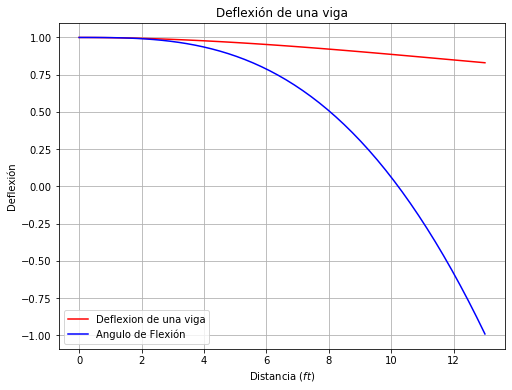

In [7]:
plt.figure(figsize=(8,6))
plt.plot(tt, xx, 'r', label = 'Deflexion de una viga')
plt.plot(tt, xx2, 'b', label = 'Angulo de Flexión')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Distancia $(ft)$')
plt.ylabel('Deflexión')
plt.title('Deflexión de una viga')
plt.show()

Observamos que su ángulo de flexión y el ángulo de delexion son menores  aplicando la misma fuerza en el extremo opuesto en donde se encuentre soportado. En este caso la longitud de nuestro elemento será de 12ft.



_____

### CONCLUSIONES ### 

* El modulo de elasticidad del material como la fuerza aplicada en nuestro sistema son los puntos mas importante dentro de este, ya que debido a ellos es como se presenta tanto el Angulo de flexión como la deflexión de la viga y nuestro elemento pasa de trabajar de solamente a tensión a compresión.


* Una viga simple sometida a esta clase de esfuerzos se comienza a flexionar de manera cóncava y a medida que la fuerza se aplica en el punto más alejado respecto al punto de apoyo de la viga, ésta sufre una deformación más extrema. Por lo que, en función de las características físicas propias de la viga en cuestión, puede llegar el momento en que no soporte la tensión y sufra de un desgarramiento. 


### FUENTES### 

* Clase16_IntroED
* Clase17_OsciladorArmonico